In [1]:
import numpy as np
import pylab as plt
import swyft
swyft.set_verbosity(0)
import torch
from scipy import stats
%load_ext autoreload
%autoreload 2

In [2]:
DEVICE = 'cuda'

## Torus model

In [3]:
def model(params, center = np.array([0.6, 0.8])):
    a, b, c = params['a'], params['b'], params['c']
    r = ((a-center[0])**2+(b-center[1])**2)**0.5  # Return radial distance from center
    x = np.array([a, r, c])
    return dict(x=x)

def noise(obs, params, noise = np.array([0.03, 0.005, 0.2])):
    x = obs['x']
    n = np.random.randn(*x.shape)*noise
    return dict(x = x + n)

In [4]:
par0 = dict(a=0.57, b=0.8, c=1.0)
obs0 = model(par0)  # Using Asimov data

In [5]:
prior = swyft.Prior({"a": ["uniform", 0., 1.], "b": ["uniform",  0., 1.], "c": ["uniform", 0., 1.]})

In [ ]:
cache = swyft.DirectoryCache(["a", "b", "c"], obs_shapes = {"x":(3,)}, path='test.zarr7')
s = swyft.NestedRatios(None, prior, noise = noise, obs = obs0, device = DEVICE, cache = cache, Ninit = 500, Nmax = 15000)
while not s.converged():
    s.run(train_args = dict(lr_schedule = [1e-3]), max_rounds = 3)
    cache.simulate(model)

NRE round: R = 1
Number of training samples is N_R = 500
Additional simulations are required after growing the cache.
No model specified. Run simulator directly on cache.
Simulate: 100%|██████████| 491/491 [00:05<00:00, 90.91it/s]
NRE round: R = 1
Number of training samples is N_R = 500
Starting neural network training.


In [59]:
post = s.gen_2d_marginals(N = 15000)

Generating marginals for: [('a',), ('a', 'b'), ('a', 'c'), ('b',), ('b', 'c'), ('c',)]
Constrained prior volume = 0.0531
Starting neural network training.


In [60]:
post_samples = post(obs0, n_samples = 100000)

findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 0.05
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal 700 normal>) = 1.335
findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXNonUn

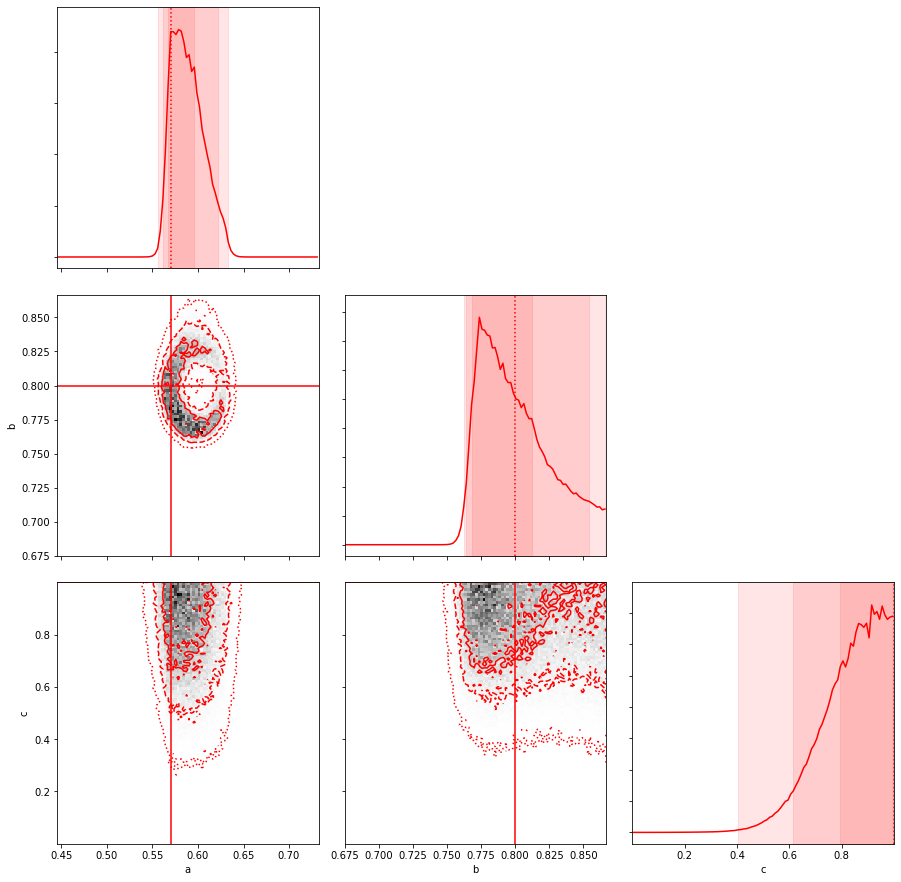

In [61]:
swyft.corner(post_samples, ["a", "b", "c"], color='r', figsize = (15,15), truth=par0)